In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import style
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
continuous=list(df.columns)
continuous.remove("State")
continuous

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

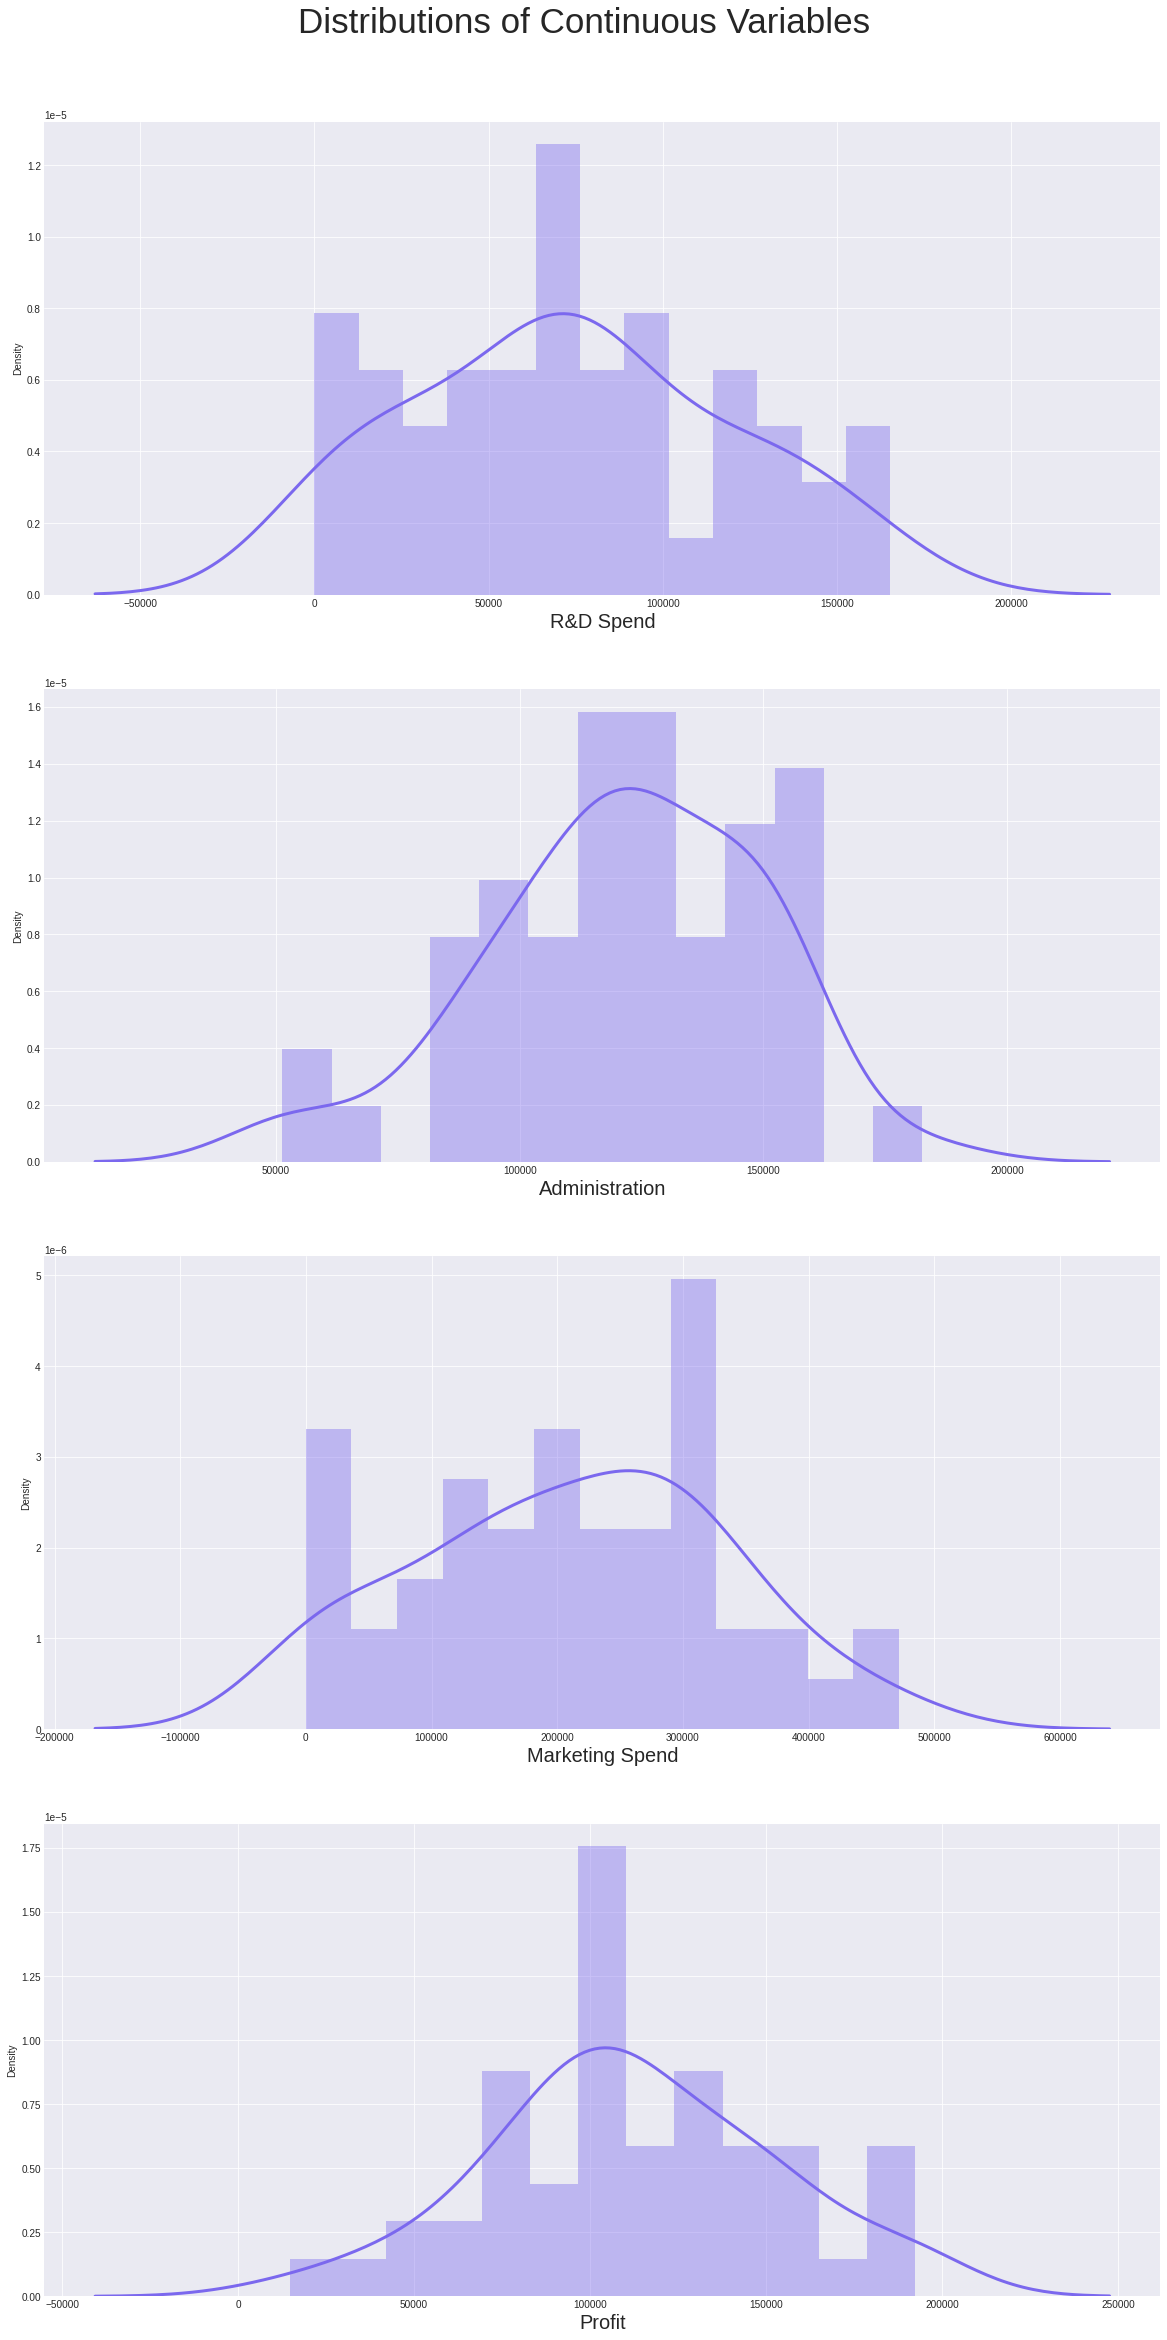

In [8]:
figure, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,40))
for col in continuous:
    i = continuous.index(col)
    sns.distplot(df[col], ax=axes[i], bins=13, kde_kws={"lw":3}, color="mediumslateblue")
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=20)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=10)
figure.suptitle("Distributions of Continuous Variables", fontsize=35, y=0.92)
plt.show()


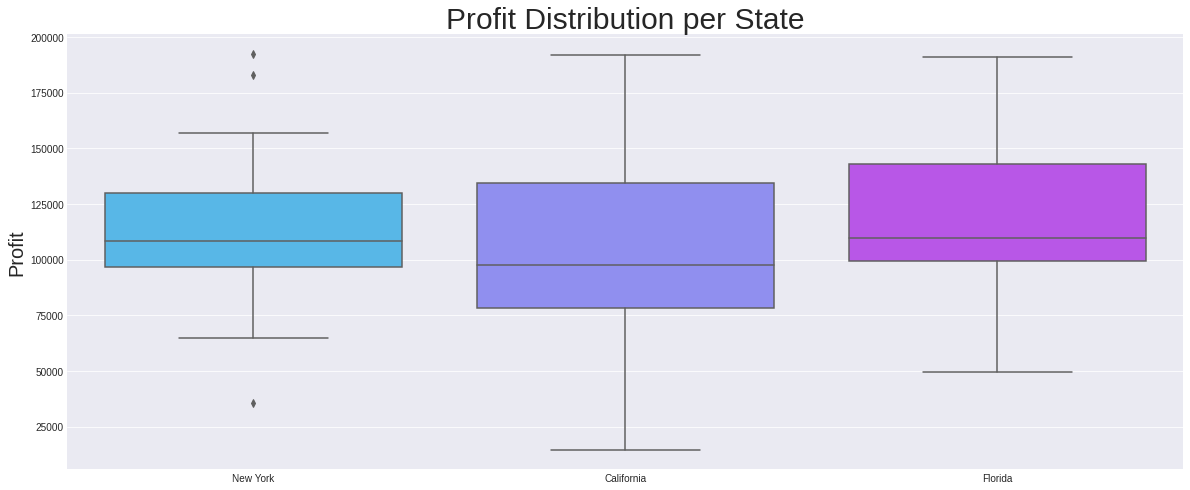

In [9]:
plt.figure(figsize=(20,8))
sns.boxplot(y="Profit", data=df, x="State", palette="cool")
plt.xlabel(None)
plt.ylabel("Profit",fontsize=20)
plt.title("Profit Distribution per State", fontsize=30)
plt.show()

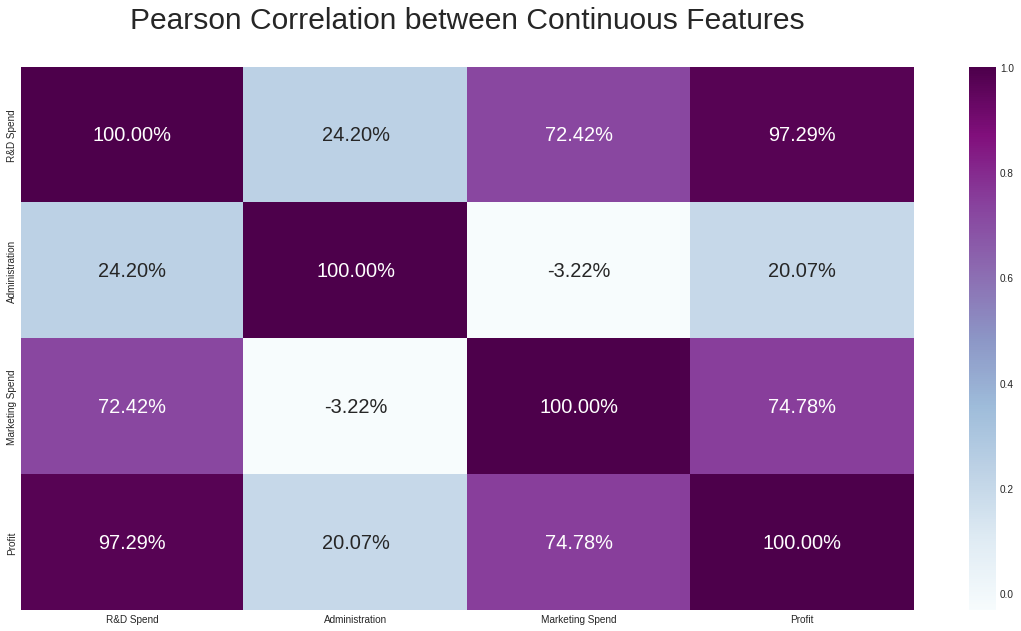

In [10]:
fig = plt.figure(figsize=(20,10))
corr = df.corr()
h = sns.heatmap(corr, annot=True, cmap="BuPu",annot_kws={'fontsize':20},fmt='.2%')
plt.title("Pearson Correlation between Continuous Features\n", fontsize=30)
plt.show()

In [11]:
# Define features and labels
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [13]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [15]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [16]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

In [17]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)
#38791988.606615104 is lowest cost achieved

Cost at epoch 0 is: 6989316078.6237135
Cost at epoch 1500 is: 93910079.250253
Cost at epoch 3000 is: 52213406.46017957
Cost at epoch 4500 is: 44053387.931024216
Cost at epoch 6000 is: 41718884.2933599
Cost at epoch 7500 is: 41048136.3698332
Cost at epoch 9000 is: 40855409.29807189
Cost at epoch 10500 is: 40800032.69430475
Cost at epoch 12000 is: 40784121.23860738
Cost at epoch 13500 is: 40779549.37241818


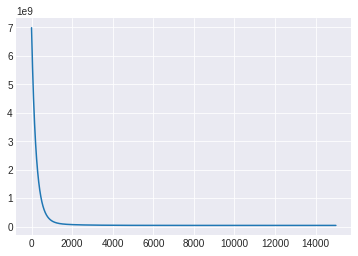

In [18]:
# Plotting the cost
plt.plot(c)

In [19]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [20]:
y_pred = predict(Xtest, w, b)

In [21]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [22]:
r2score(y_pred, Ytest)

0.9397254670323116

In [23]:
# Comparing it with model defined in the library
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(Xtrain, Ytrain)
y_pred_linear_reg = linear_reg.predict(Xtest)

linear_reg_r2_score = linear_reg.score(Xtest, Ytest)

print("Linear Regression R^2 Score: {:.4f}".format(linear_reg_r2_score))

Linear Regression R^2 Score: 0.9397
